In [67]:
import pandas as pd
import numpy as np
import datetime 
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
TotalCases = pd.read_csv("https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/export?format=csv&gid=0")

In [69]:
LineList= pd.read_csv("https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/export?format=csv&gid=1187587451")

In [70]:
ProvinceIncidence= pd.read_csv("https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/export?format=csv&gid=1837322948")

In [71]:
IncidentLog = pd.read_csv("https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/export?format=csv&gid=1202885709")

In [72]:
IncidentLogSecond= pd.read_csv("https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/export?format=csv&gid=1180262595")

In [134]:
TotalCases.head(5)

,Province,Confirmed,Suspected,Death,Recovered,Link,Comments
0,Total,40339.0,23589.0,909.0,3471.0,http://3g.dxy.cn/newh5/view/pneumonia,NaN
1,Hubei,29631.0,NaN,NaN,NaN,NaN,NaN
2,Guangdong,1159.0,NaN,NaN,NaN,NaN,NaN
3,Zhejiang,1092.0,NaN,NaN,NaN,NaN,NaN
4,Henan,1073.0,NaN,NaN,NaN,NaN,NaN


In [74]:
LineList.head(5)

,Email,Unnamed: 1,contact.sunky@gmail.com,Unnamed: 3,Email was incorrect before,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,international_traveler,domestic_traveler,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
1,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,1/3/2020,0,...,NaN,NaN,NaN,1,0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,1/15/2020,0,...,NaN,NaN,NaN,0,1,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,1/4/2020,0,...,NaN,NaN,NaN,0,1,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [75]:
# Dropping columns 
LineList.head(5)
LineList.drop(columns=["Unnamed: 19"] ,axis=1, inplace=True)
#LineList.drop(columns=["Email","Unnamed: 3","Email was incorrect before","Unnamed: 20"] ,axis=1, inplace=True)

In [76]:
LineList.head(5)

,Email,Unnamed: 1,contact.sunky@gmail.com,Unnamed: 3,Email was incorrect before,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,international_traveler,domestic_traveler,traveler,visiting Wuhan,from Wuhan,death,symptom,source,link
1,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,1/3/2020,0,...,1/4/2020,NaN,NaN,NaN,1,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,1/15/2020,0,...,1/12/2020,NaN,NaN,NaN,0,1,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,1/4/2020,0,...,1/3/2020,NaN,NaN,NaN,0,1,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [77]:
# Renaming columns

In [78]:
LineList = LineList.rename(columns={"Unnamed: 1": "Case In Country","Unnamed: 5": "Country","contact.sunky@gmail.com": "reporting date","Unnamed: 5": "country","Unnamed: 6":"gender", "Unnamed: 7":"age","Unnamed: 8": "symptom_onset", "Unnamed: 9":"If_onset_approximated","Unnamed: 10": "hosp_visit_date","Unnamed: 11":"exposure_start","Unnamed: 12": "exposure_end", "Unnamed: 13":"traveler","Unnamed: 14":"visiting Wuhan","Unnamed: 15": "from Wuhan","Unnamed: 16": "death","Unnamed: 17": "recovered","Unnamed: 18": "symptom"})

In [79]:
LineList.head(5)

,Email,Case In Country,reporting date,Unnamed: 3,Email was incorrect before,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,international_traveler,domestic_traveler,traveler,visiting Wuhan,from Wuhan,death,symptom,source,link
1,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,1/3/2020,0,...,1/4/2020,NaN,NaN,NaN,1,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,1/15/2020,0,...,1/12/2020,NaN,NaN,NaN,0,1,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,1/4/2020,0,...,1/3/2020,NaN,NaN,NaN,0,1,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [80]:
LineList.drop(0, inplace = True)

In [81]:
LineList.head(5)


,Email,Case In Country,reporting date,Unnamed: 3,Email was incorrect before,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,Unnamed: 20,Unnamed: 21,Unnamed: 22
1,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,1/3/2020,0,...,1/4/2020,NaN,NaN,NaN,1,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,1/15/2020,0,...,1/12/2020,NaN,NaN,NaN,0,1,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,1/4/2020,0,...,1/3/2020,NaN,NaN,NaN,0,1,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [82]:
LineList.shape



(2310, 22)

In [83]:
#LineList.drop(LineList['symptom_onset']=='male',axis=0, inplace=True)
LineList[LineList.symptom_onset =='male']
LineList.drop(2224,inplace=True)


In [84]:
#Converting fields to dates
#LineList['reporting date']= pd.to_datetime(LineList['reporting date'])
LineList[['reporting date','symptom_onset','hosp_visit_date','exposure_start','exposure_end']] = LineList[['reporting date','symptom_onset','hosp_visit_date','exposure_start','exposure_end']].apply(pd.to_datetime)


In [85]:
LineList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 1 to 2310
Data columns (total 22 columns):
Email                         2309 non-null object
Case In Country               2112 non-null object
reporting date                2308 non-null datetime64[ns]
Unnamed: 3                    2304 non-null object
Email was incorrect before    2158 non-null object
country                       2222 non-null object
gender                        1401 non-null object
age                           1272 non-null object
symptom_onset                 675 non-null datetime64[ns]
If_onset_approximated         647 non-null object
hosp_visit_date               612 non-null datetime64[ns]
exposure_start                189 non-null datetime64[ns]
exposure_end                  479 non-null datetime64[ns]
traveler                      743 non-null object
visiting Wuhan                757 non-null object
from Wuhan                    659 non-null object
death                         1605 non-null o

In [86]:
LineList.head()

,Email,Case In Country,reporting date,Unnamed: 3,Email was incorrect before,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,Unnamed: 20,Unnamed: 21,Unnamed: 22
1,1,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,2020-01-03,0,...,2020-01-04,NaN,NaN,NaN,1,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,2,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,2020-01-15,0,...,2020-01-12,NaN,NaN,NaN,0,1,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,3,NaN,2020-01-21,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,2020-01-04,0,...,2020-01-03,NaN,NaN,NaN,0,1,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,4,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,NaT,NaN,...,NaT,NaN,NaN,NaN,1,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,5,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58,NaT,NaN,...,NaT,NaN,NaN,NaN,0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [87]:
LineList.shape

(2309, 22)

In [88]:
LineList.isna().sum()

Email                            0
Case In Country                197
reporting date                   1
Unnamed: 3                       5
Email was incorrect before     151
country                         87
gender                         908
age                           1037
symptom_onset                 1634
If_onset_approximated         1662
hosp_visit_date               1697
exposure_start                2120
exposure_end                  1830
traveler                      1566
visiting Wuhan                1552
from Wuhan                    1650
death                          704
recovered                      708
symptom                        699
Unnamed: 20                   1971
Unnamed: 21                    704
Unnamed: 22                    688
dtype: int64

In [89]:
LineList.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 1 to 2310
Data columns (total 22 columns):
Email                         2309 non-null object
Case In Country               2112 non-null object
reporting date                2308 non-null datetime64[ns]
Unnamed: 3                    2304 non-null object
Email was incorrect before    2158 non-null object
country                       2222 non-null object
gender                        1401 non-null object
age                           1272 non-null object
symptom_onset                 675 non-null datetime64[ns]
If_onset_approximated         647 non-null object
hosp_visit_date               612 non-null datetime64[ns]
exposure_start                189 non-null datetime64[ns]
exposure_end                  479 non-null datetime64[ns]
traveler                      743 non-null object
visiting Wuhan                757 non-null object
from Wuhan                    659 non-null object
death                         1605 non-null o

In [90]:
LineList['age'] = pd.to_numeric(LineList.age, errors='coerce')

In [91]:
LineList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 1 to 2310
Data columns (total 22 columns):
Email                         2309 non-null object
Case In Country               2112 non-null object
reporting date                2308 non-null datetime64[ns]
Unnamed: 3                    2304 non-null object
Email was incorrect before    2158 non-null object
country                       2222 non-null object
gender                        1401 non-null object
age                           1272 non-null float64
symptom_onset                 675 non-null datetime64[ns]
If_onset_approximated         647 non-null object
hosp_visit_date               612 non-null datetime64[ns]
exposure_start                189 non-null datetime64[ns]
exposure_end                  479 non-null datetime64[ns]
traveler                      743 non-null object
visiting Wuhan                757 non-null object
from Wuhan                    659 non-null object
death                         1605 non-null 

In [92]:
LineList.head(5)

,Email,Case In Country,reporting date,Unnamed: 3,Email was incorrect before,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,Unnamed: 20,Unnamed: 21,Unnamed: 22
1,1,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,0,...,2020-01-04,NaN,NaN,NaN,1,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,2,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,0,...,2020-01-12,NaN,NaN,NaN,0,1,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,3,NaN,2020-01-21,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-04,0,...,2020-01-03,NaN,NaN,NaN,0,1,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,4,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaT,NaN,...,NaT,NaN,NaN,NaN,1,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,5,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaT,NaN,...,NaT,NaN,NaN,NaN,0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [93]:
LineListComplete= LineList.dropna()
symptondf= LineList[LineList['symptom'].notnull()]

In [94]:
#DF with no missing days. 
DaysComplete =LineList[LineList['hosp_visit_date'].notnull() & LineList['exposure_start'].notnull() & LineList['exposure_end'].notnull() ]

In [95]:
DaysComplete

,Email,Case In Country,reporting date,Unnamed: 3,Email was incorrect before,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,Unnamed: 20,Unnamed: 21,Unnamed: 22
1,1,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,0,...,2020-01-04,NaN,NaN,NaN,1,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
8,8,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,2020-01-14,0,...,2020-01-11,NaN,NaN,NaN,1,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
9,9,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,2020-01-09,0,...,2020-01-04,NaN,NaN,NaN,1,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
10,10,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,2020-01-16,0,...,2020-01-16,NaN,NaN,NaN,1,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
11,11,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,female,18.0,2020-01-19,0,...,2020-01-17,NaN,NaN,NaN,1,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
12,12,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,female,32.0,2020-01-15,0,...,2020-01-17,NaN,NaN,NaN,1,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
23,23,NaN,2020-01-22,First confirmed imported COVID-19 pneumonia pa...,Shanxi,China,male,NaN,2020-01-19,0,...,2020-01-15,NaN,NaN,NaN,1,0,0,NaN,央视新闻,https://www.weibo.com/2656274875/IqGCB0OTO?fro...
36,36,NaN,2020-01-22,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,45.0,2020-01-19,0,...,2020-01-14,NaN,NaN,NaN,1,0,0,NaN,央视新闻,https://m.weibo.cn/status/4463681624289721?
72,72,NaN,2020-01-22,new confirmed imported COVID-19 pneumonia pati...,Guizhou,China,female,50.0,2020-01-14,0,...,2020-01-12,NaN,NaN,NaN,0,0,0,NaN,央视新闻,https://m.weibo.cn/status/4463876156726203?
73,73,NaN,2020-01-23,First confirmed COVID-19 pneumonia patient in ...,Gansu,China,male,43.0,2020-01-18,0,...,2020-01-17,NaN,NaN,NaN,0,0,0,NaN,央视新闻,https://m.weibo.cn/status/4463886797528385?


In [96]:
#Data Frame to use
symptondf

,Email,Case In Country,reporting date,Unnamed: 3,Email was incorrect before,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,Unnamed: 20,Unnamed: 21,Unnamed: 22
1,1,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,0,...,2020-01-04,NaN,NaN,NaN,1,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,2,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,0,...,2020-01-12,NaN,NaN,NaN,0,1,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,3,NaN,2020-01-21,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-04,0,...,2020-01-03,NaN,NaN,NaN,0,1,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,4,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaT,NaN,...,NaT,NaN,NaN,NaN,1,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,5,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaT,NaN,...,NaT,NaN,NaN,NaN,0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
6,6,NaN,2020-01-21,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.0,2020-01-15,0,...,NaT,NaN,NaN,NaN,0,1,0,NaN,Chongqing Municipal Health Commission,http://wsjkw.cq.gov.cn/tzgg/20200121/249730.html
7,7,NaN,2020-01-21,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.0,2020-01-11,0,...,NaT,NaN,NaN,NaN,0,1,0,NaN,央视新闻,https://m.weibo.cn/status/4463300522087848?
8,8,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,2020-01-14,0,...,2020-01-11,NaN,NaN,NaN,1,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
9,9,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,2020-01-09,0,...,2020-01-04,NaN,NaN,NaN,1,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
10,10,NaN,2020-01-21,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,2020-01-16,0,...,2020-01-16,NaN,NaN,NaN,1,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...


In [97]:
symptondf.shape



(1610, 22)

In [98]:
symptondf.isna().sum()

Email                            0
Case In Country                197
reporting date                   1
Unnamed: 3                       5
Email was incorrect before      43
country                          0
gender                         362
age                            451
symptom_onset                  951
If_onset_approximated          975
hosp_visit_date               1015
exposure_start                1460
exposure_end                  1190
traveler                      1466
visiting Wuhan                1465
from Wuhan                     990
death                            5
recovered                        9
symptom                          0
Unnamed: 20                   1272
Unnamed: 21                      5
Unnamed: 22                      5
dtype: int64

In [99]:
LineListComplete


,Email,Case In Country,reporting date,Unnamed: 3,Email was incorrect before,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,Unnamed: 20,Unnamed: 21,Unnamed: 22


In [100]:
LineListComplete.shape

(0, 22)

In [101]:
# Getting days values from dates
# Using DF with no missing values and DF with no missing dates, for comparison. 
statistics.median(DaysComplete['hosp_visit_date'] - DaysComplete['exposure_start']).days


11

In [102]:
statistics.median(DaysComplete['hosp_visit_date'] - DaysComplete['exposure_start']).days

11

In [103]:
statistics.median(DaysComplete['reporting date'] -DaysComplete['hosp_visit_date']).days


2

In [104]:
statistics.median(DaysComplete['reporting date'] - DaysComplete['exposure_end']).days

9

In [105]:
statistics.median(DaysComplete['exposure_end']- DaysComplete['exposure_start']).days

3

In [106]:
ProvinceIncidence.head(5)

,Pro,province,new,cumu
0,1/10/2020,Hubei,41.0,41.0
1,1/16/2020,Hubei,4.0,45.0
2,1/17/2020,Hubei,17.0,62.0
3,1/17/2020,Zhejiang,5.0,5.0
4,1/18/2020,Hubei,59.0,NaN


In [107]:
IncidentLog.head(5)

,id,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,type_of_visit,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,0.0,1/28/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,male,80.0,1/25/2020,1.0,1/25/2020,hospital,NaN,1/23/2020,0.0,1.0,0.0,0.0,NaN,The Local,https://www.thelocal.de/20200128/number-of-ger...
1,1.0,1/29/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,female,NaN,NaN,NaN,NaN,hospital,NaN,1/23/2020,1.0,0.0,0.0,0.0,NaN,The Local,https://www.thelocal.fr/20200131/coronavirus-i...
2,2.0,1/30/2020,"new confirmed COVID-19 patient in Japan: male,...",Tokyo,Japan,male,45.0,NaN,NaN,NaN,NaN,NaN,1/29/2020,1.0,0.0,0.0,0.0,"throat pain, fever",Bangkok Post,https://www.bangkokpost.com/world/1846939/thre...
3,3.0,1/30/2020,"new confirmed COVID-19 patient in Japan: male,...",Tokyo,Japan,male,45.0,NaN,NaN,NaN,NaN,NaN,1/29/2020,1.0,0.0,0.0,0.0,NaN,Bangkok Post,https://www.bangkokpost.com/world/1846939/thre...
4,4.0,1/30/2020,new confirmed COVID-19 patient in Japan: femal...,Tokyo,Japan,female,55.0,NaN,NaN,NaN,NaN,NaN,1/29/2020,1.0,0.0,0.0,0.0,NaN,Bangkok Post,https://www.bangkokpost.com/world/1846939/thre...


In [108]:
IncidentLogSecond.head()

,id,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,type_of_visit,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,NaN,02/02/2020,NaN,Beijing,China,female,42,1/30/2020,0,1/30/2020,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
1,NaN,02/02/2020,NaN,Beijing,China,male,20,1/30/2020,0,1/31/2020,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
2,NaN,02/02/2020,NaN,Beijing,China,female,44,1/31/2020,0,2/1/2020,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
3,NaN,02/02/2020,NaN,Beijing,China,male,75,1/27/2020,0,1/31/2020,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
4,NaN,02/02/2020,NaN,Beijing,China,female,43,1/30/2020,0,1/31/2020,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...


In [109]:
LineListComplete.shape

(0, 22)

In [110]:
#IncidentLogSecond.shape

In [111]:
#IncidentLogSecond.isna().sum()

In [112]:
#IncidentLog.head()

In [113]:
#IncidentLog.shape

In [114]:
#IncidentLog.isna().sum()

In [115]:
#Graphics 
sns.set_style("dark")


In [116]:
LineListComplete

,Email,Case In Country,reporting date,Unnamed: 3,Email was incorrect before,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,Unnamed: 20,Unnamed: 21,Unnamed: 22


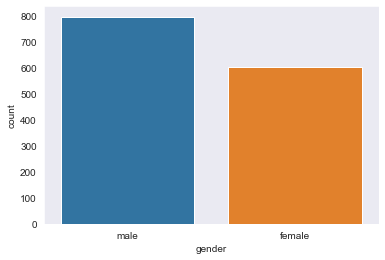

In [126]:
sns.countplot(x='gender',data=LineList)

In [118]:
strippplotdf = LineList[LineList['country'].notnull() & LineList['age'].notnull() & LineList['gender'].notnull()]

In [119]:
strippplotdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 1 to 2310
Data columns (total 22 columns):
Email                         1227 non-null object
Case In Country               1037 non-null object
reporting date                1227 non-null datetime64[ns]
Unnamed: 3                    1223 non-null object
Email was incorrect before    1227 non-null object
country                       1227 non-null object
gender                        1227 non-null object
age                           1227 non-null float64
symptom_onset                 649 non-null datetime64[ns]
If_onset_approximated         622 non-null object
hosp_visit_date               588 non-null datetime64[ns]
exposure_start                129 non-null datetime64[ns]
exposure_end                  340 non-null datetime64[ns]
traveler                      150 non-null object
visiting Wuhan                152 non-null object
from Wuhan                    420 non-null object
death                         1119 non-null 

In [120]:
strippplotdf.shape

(1227, 22)

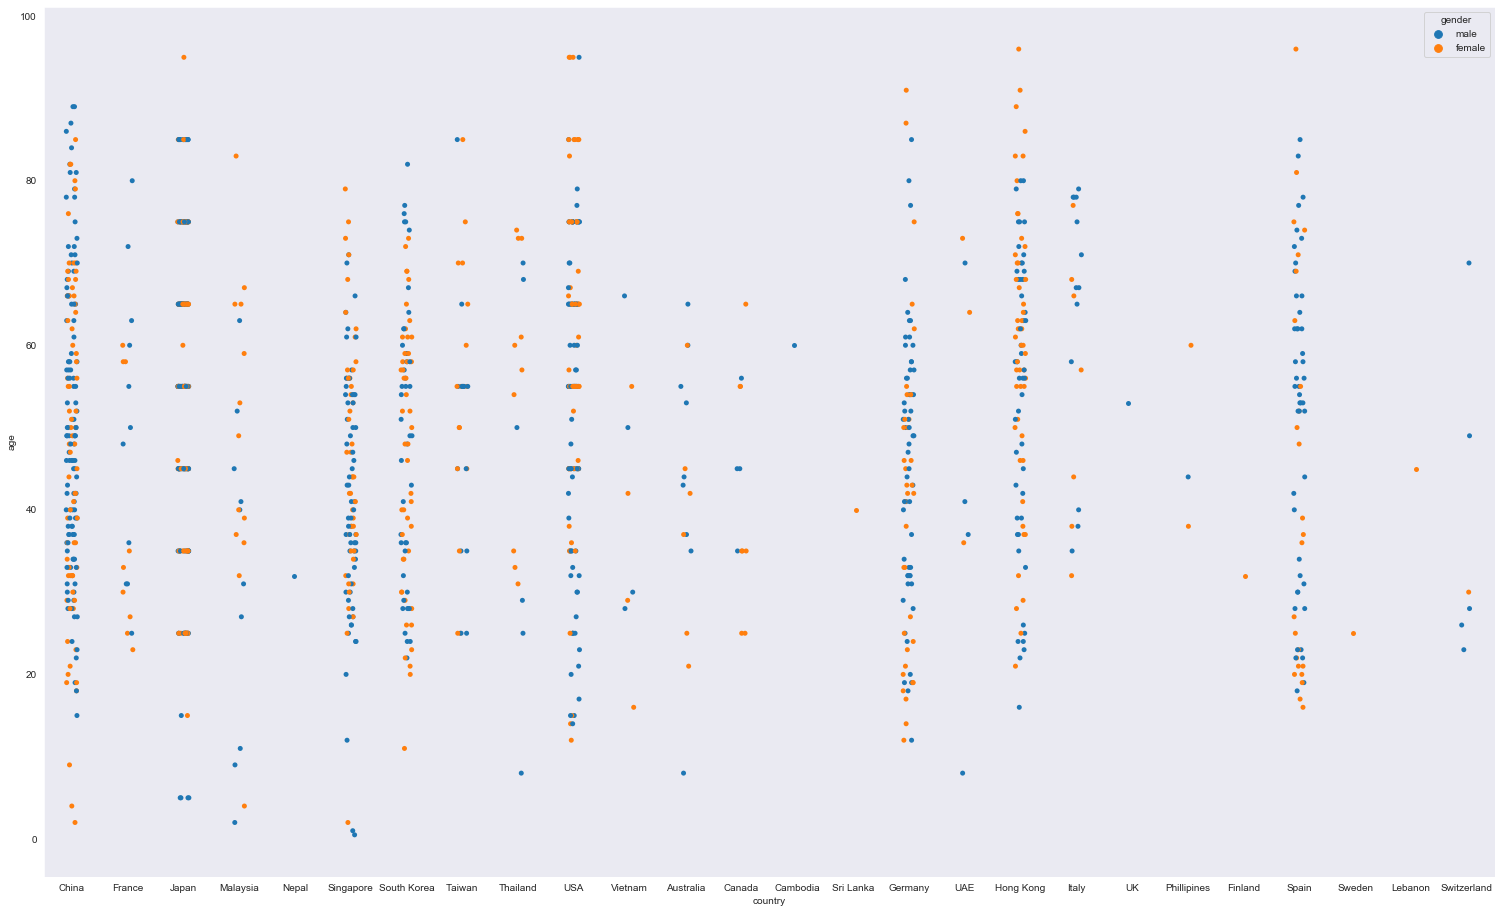

In [124]:
plt.figure(figsize=(26, 16))
sns.stripplot(x='country',y='age',data=strippplotdf,hue='gender')


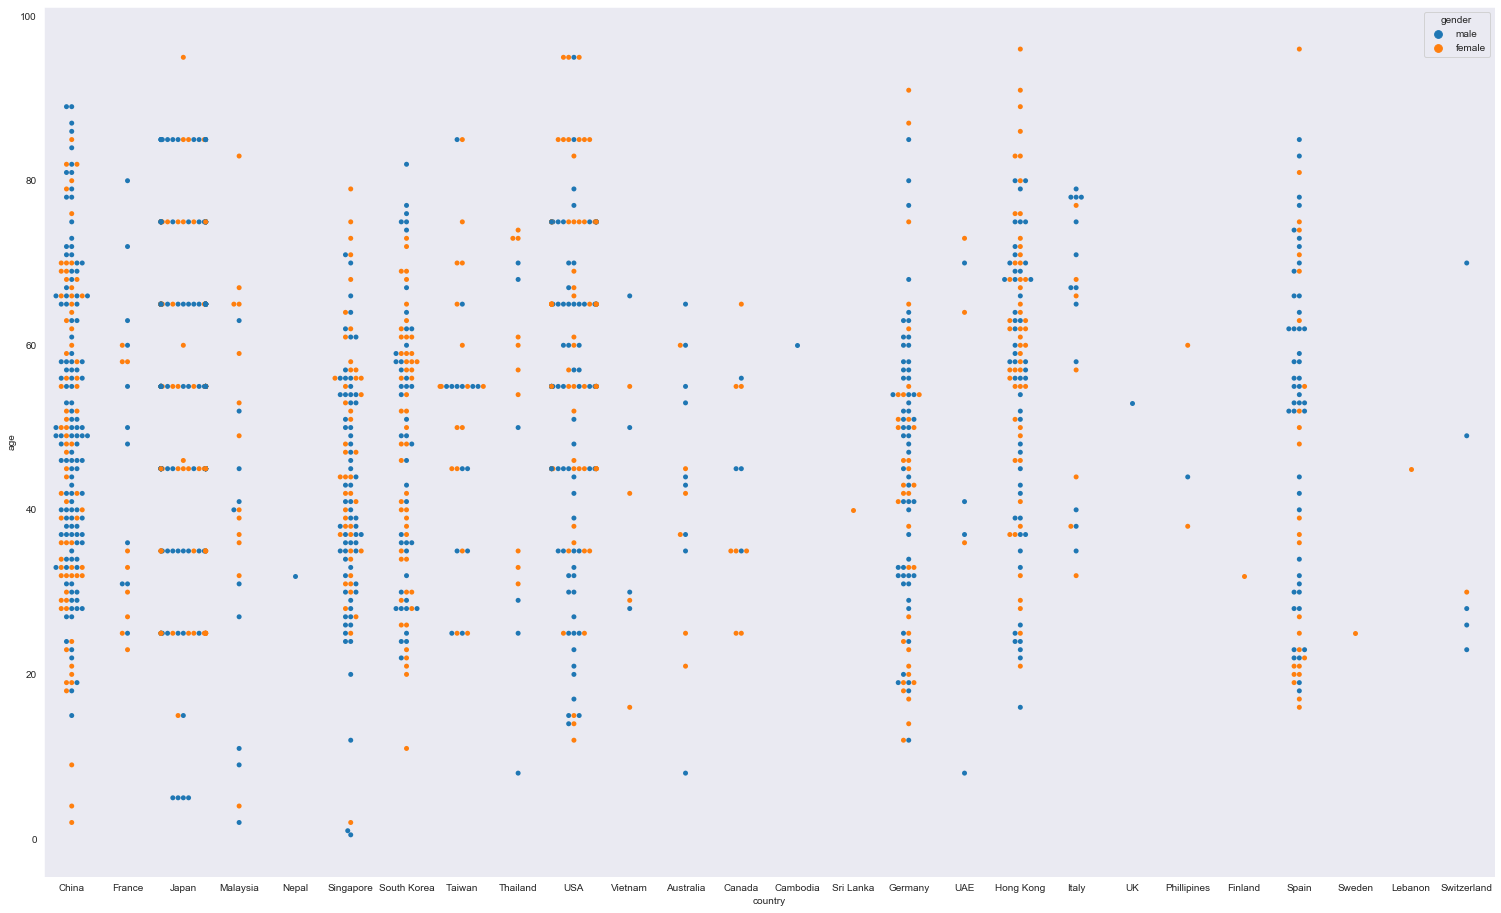

In [122]:
plt.figure(figsize=(26, 16))
sns.swarmplot(x='country',y='age',data=strippplotdf,hue='gender')

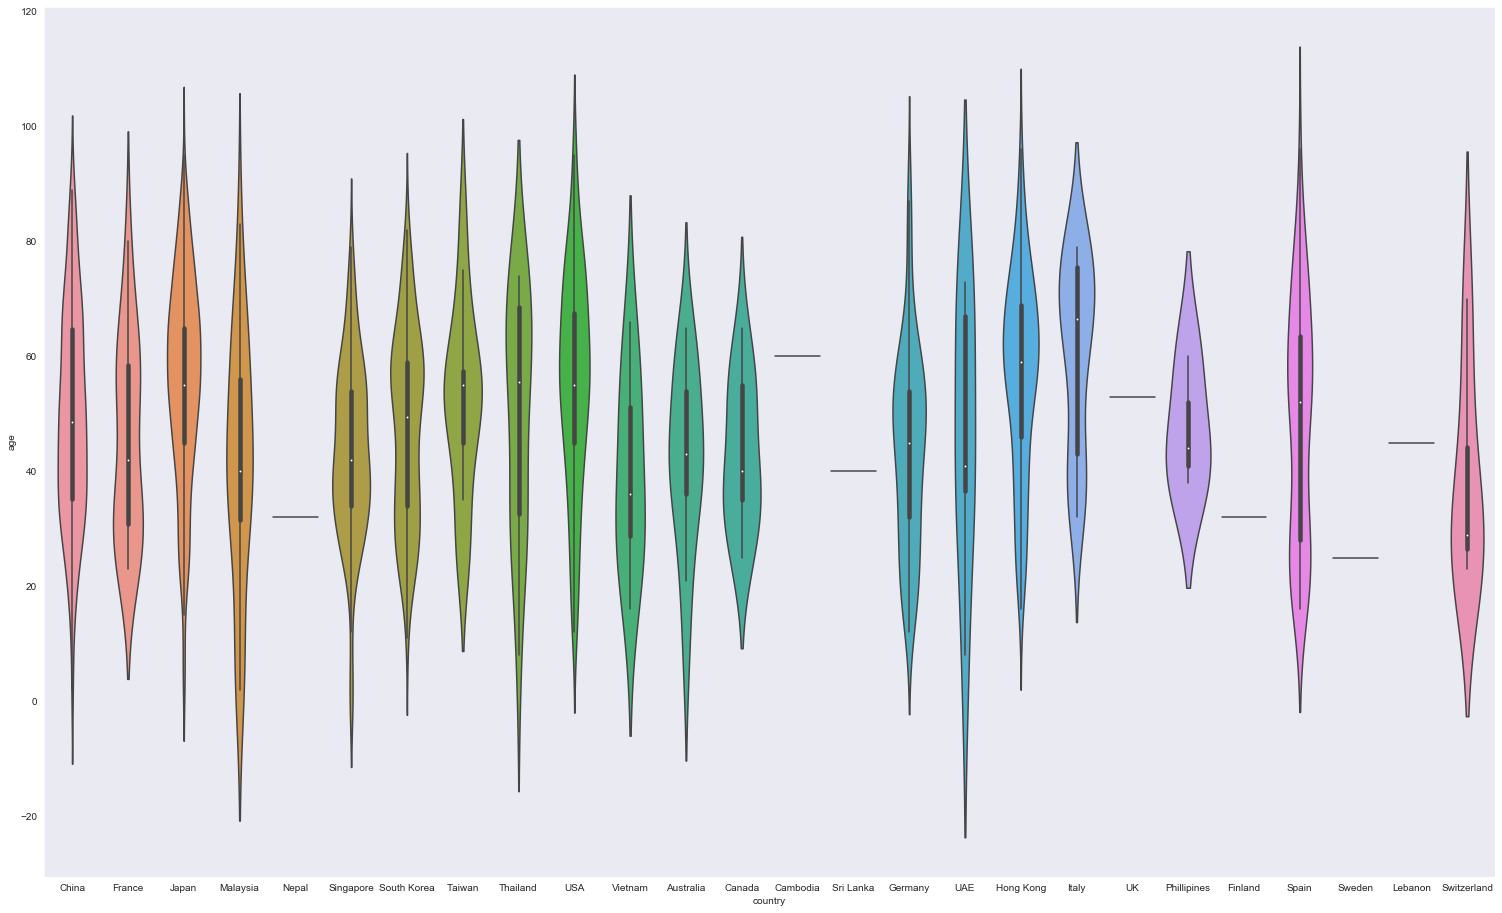

In [123]:
plt.figure(figsize=(26, 16))
sns.violinplot(x='country',y='age',data=strippplotdf)

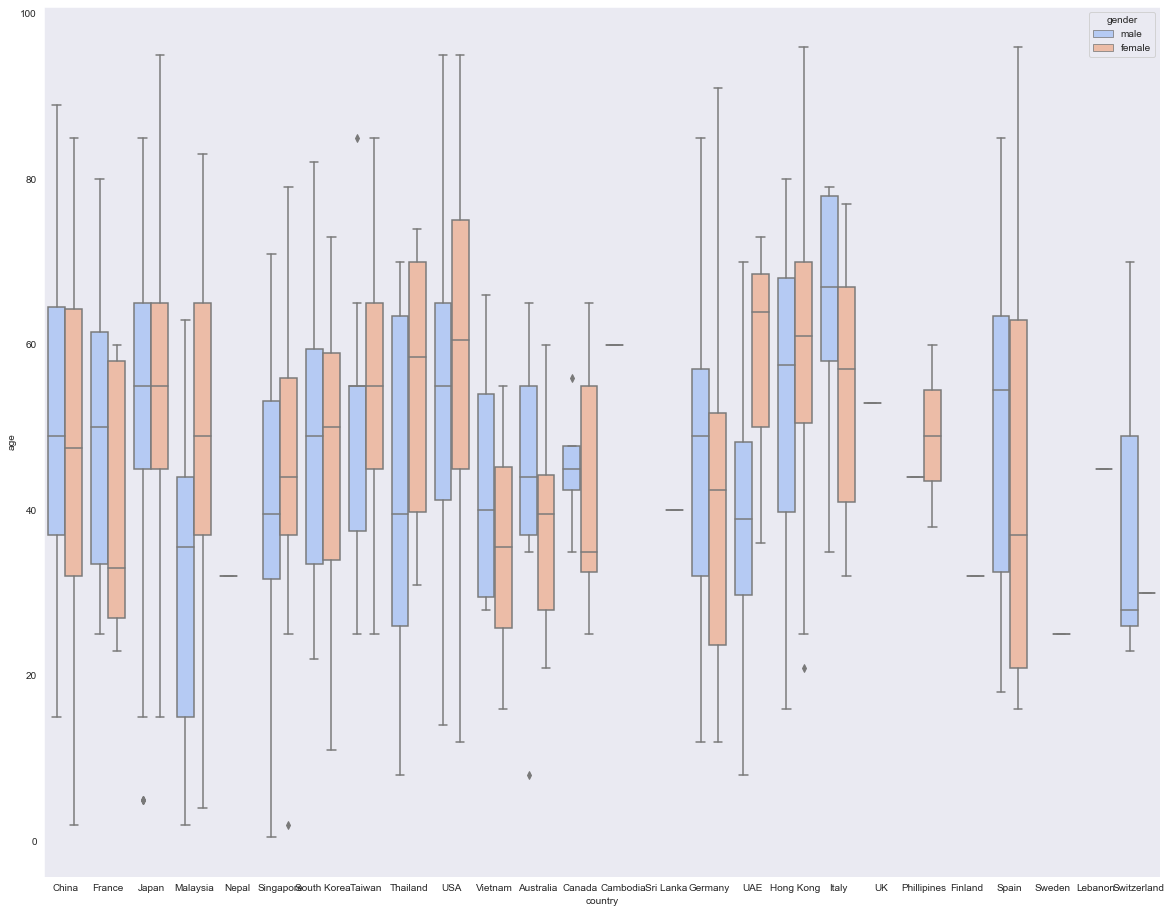

In [133]:
plt.figure(figsize=(20, 16))
sns.boxplot(x="country", y="age", hue="gender",data=strippplotdf, palette="coolwarm")

In [ ]:
#Total Cases



In [137]:
TotalCases.shape

(77, 7)